Objectif
Dans ce point de contrôle, nous allons travailler sur l’ensemble de données Titanic pour prédire si 
un passager survivra ou non en utilisant plusieurs algorithmes de classification de l’apprentissage supervisé.
Nous commencerons par régression logistique, knn, puis arbre de décision et nous finaliserons par forêt aléatoire.

Instructions
Partie 1 Régression logistique

1. Appliquer la régression logistique.

2. Utilisez la matrice de confusion pour valider votre modèle.

3. Une autre matrice de validation pour la classification est ROC / AUC,
faites vos recherches sur eux expliquez-les et appliquez-les dans notre cas.

Partie 2 KNN

1. Appliquez le KNN et prédisez votre modèle

2. Choisissez le nombre optimal de voisins

Partie 3 : Arbre de décision et forêt aléatoire

1. Appliquez un arbre de décision et prédisez votre modèle

2. Tracez votre arbre de décision et essayez de lire les branches de l’arbre et de conclure une prédiction manuellement.

3. Modifier les paramètres de l’arbre de décision (changer au moins deux paramètres),

4. Calculez la nouvelle précision et comparez-la avec les résultats précédents.

5. Utilisez une forêt aléatoire puis modifiez le nombre d’estimateurs

6. Calculez la nouvelle précision et comparez-la avec le résultat précédent.

Maintenant, pour finaliser votre projet, faites un graphique récapitulatif qui reprend toutes les précisions
de chaque modèle (régression logistique, knn Arbre de décision et forêt aléatoire) pour décider quel modèle est le plus performant.

In [304]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: graphviz in c:\users\zigui oumaro\anaconda3\lib\site-packages (0.20.1)



# Importer les librairies necessaires

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
import sklearn.metrics
from sklearn import metrics
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import sklearn
import io
import requests
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# CHARGER LE JEU DE DONNEE

In [306]:
df = pd.read_csv('titanic-passengers.csv',sep=";" )
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [307]:
#copie du dataset
df2 = df.copy() 

In [308]:
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


(891, 12)

In [309]:
df2.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Nettoyage des donnees et selection des fonctionalites

In [310]:
#recherche de valeurs manquantes
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [311]:
#recherche de doublons
df2.duplicated().sum()

0

In [312]:
#creation d'une colonne title
df2['title'] = df2.Name.str.extract('([A-Za-z]+)\.')
print(df2['title'].unique())

['Mr' 'Mrs' 'Miss' 'Dr' 'Major' 'Don' 'Master' 'Rev' 'Col' 'Mlle' 'Lady'
 'Jonkheer' 'Mme' 'Sir' 'Capt' 'Countess' 'Ms']


In [313]:
#creation d'une colonne alone
df2['alone'] = df2['SibSp'] + df2['Parch'] 
df2['alone'].loc[df2['alone'] > 0] = 'no'
df2['alone'].loc[df2['alone'] == 0] = 'yes'

In [314]:
#Creation d'une colonne taille de la famille
df2['family_size'] = df2['SibSp'] + df2['Parch'] + 1

In [315]:
#Création d'une colonne definissant si la personne est [Enfant, Jeune_Ado, Adulte ou Ainé(Vieillard)]
def cat_personne(passenger):
  Age, gender = passenger
  if Age >= 0 and Age <= 14:
    return 'child'
  elif Age >= 15 and Age <= 24:
    return 'young'
  elif Age >= 25 and Age <= 64:
    return 'adult'
  else:
    return 'old_man'
df2['gender'] = np.nan
df2['gender'] = df2[['Age', 'gender']].apply(cat_personne, axis=1)
df2.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,alone,family_size,gender
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,Mr,yes,1,adult
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr,yes,1,adult
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,Mr,yes,1,young
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,Mrs,no,5,adult
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr,no,2,adult


In [316]:
#remplacer les valeurs manquantes de la variable âge
df2['Age'].fillna(df2['Age'].median(0),inplace=True)
df2['Age']= df2['Age'].astype(float).astype(int)

In [317]:
#remplacer les valeurs manquantes de la variable Embarked
df2['Embarked'].fillna('S',inplace=True)
#remplacer les valeurs manquantes de la variable Cabin
df2['Cabin'].fillna('G6',inplace=True)

In [318]:
#conversion de la variable sex de type objet en numerique
cleanup_nums = {
    "Sex" : {"male" : 1,"female" : 0} 
}
df2.replace(cleanup_nums, inplace= True)

In [319]:
df2.drop(['Name','Ticket','Fare','PassengerId','Cabin','SibSp','Parch','Embarked'], axis=1, inplace=True)
df2.head()

,Survived,Pclass,Sex,Age,title,alone,family_size,gender
0,No,2,1,28,Mr,yes,1,adult
1,No,3,1,25,Mr,yes,1,adult
2,No,3,1,20,Mr,yes,1,young
3,No,3,0,29,Mrs,no,5,adult
4,No,1,1,31,Mr,no,2,adult


In [320]:
#conversion de la variable alone de type objet en numerique
cleanup_nums = {
    "alone" : {"yes" : 1,"no" : 0} 
}
df2.replace(cleanup_nums, inplace= True)

In [321]:
#conversion de la variable title de type objet en numerique
cleanup_nums = {
    "title" : {'Mr': 0, 'Mrs': 1,'Miss' : 2, 'Dr' : 3,'Major' : 4, 'Don' : 5,'Master' :6, 'Rev': 7, 'Col': 8, 'Mlle':9,'Lady': 10,
 'Jonkheer' :11, 'Mme' : 12, 'Sir': 13, 'Capt': 14, 'Countess' : 15, 'Ms': 16} 
}
df2.replace(cleanup_nums, inplace= True)

In [322]:
#conversion de la variable gender de type objet en numerique
cleanup_nums = {
    "gender" : {'adult': 0, 'young': 1,'child' : 2, 'old_man' : 3} 
}
df2.replace(cleanup_nums, inplace= True)

In [323]:
df3 = df2.copy()
df4 = df2.copy()

# Préparation des données de régression logistique

In [324]:
#preparation des donnees de regression logistique
df2["Survived"]=df2["Survived"].map({"Yes": 1, "No": 0})
df2.head()

,Survived,Pclass,Sex,Age,title,alone,family_size,gender
0,0,2,1,28,0,1,1,0
1,0,3,1,25,0,1,1,0
2,0,3,1,20,0,1,1,1
3,0,3,0,29,1,0,5,0
4,0,1,1,31,0,0,2,0


In [325]:
x = df2.drop('Survived', axis=1)
y = df2['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)

In [326]:
# creation du modele de regression logistiaue
logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)  
print(y_pred)
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))
print(" prediction : {} " .format(accuracy_score(y_test, y_pred)* 100))
print(classification_report(y_test,y_pred))

[0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1
 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1]
Accuracy=0.77
 prediction : 76.53631284916202 
              precision    recall  f1-score   support

           0       0.74      0.88      0.81        99
           1       0.81      0.62      0.70        80

    accuracy                           0.77       179
   macro avg       0.78      0.75      0.75       179
weighted avg       0.77      0.77      0.76       179



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

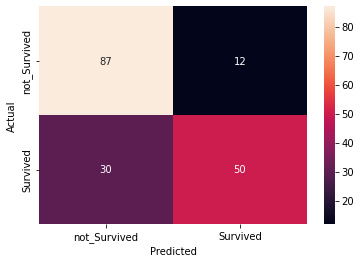

In [327]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, xticklabels=['not_Survived', 'Survived'], yticklabels=['not_Survived', 'Survived'])

#La matrice de confusion montre le total des détails des données X_test comme suit:
TP = vrais positifs = 54
TN = vrais négatifs = 87
FP = faux positifs = 13
FN = faux négatifs = 25

#La sensibilité nous indique quelle proportion de la classe positive a été correctement classée.

sensibilité// Taux de positivité réelle / Rappel = TP / (TP + FN) = 54/79 = 0.68

La proportion de personnes réelles qui ont survecues  qui a été correctement détectée par le modèle.

#Taux de faux négatifs

Le taux de faux négatifs (FNR) nous indique quelle proportion de la classe positive a été mal classée par le classificateur.

FNR =  FN / (TP + FN) = 25/79= 0.31

Un TPR plus élevé et un FNR plus faible sont souhaitables car nous voulons classer correctement la classe positive.

#Spécificité / Taux négatif réel
Formule de spécificité
TNR = TN / (TN + FP) = 130/143 =0.90
La spécificité nous indique quelle proportion de la classe négative a été correctement classée.

Taux de faux positifs

FPR nous indique quelle proportion de la classe négative a été mal classée par le classificateur.

FPR = 1 - TNR = 1-0.90 = 0.10

Un TNR plus élevé et un FPR plus faible sont souhaitables car nous voulons classer correctement la classe négative.

#Ainsi, la précision totale selon la confusion_matrix est:
#Précision = (TP + TN) / Total = (54 + 61) / 223 = 0,825



Maintenant, nous allons contre-vérifier le résultat par impression.
Donc, nous imprimons simplement les 5 premiers éléments du X_test et
du y_test  en utilisant la fonction head pandas.
Ensuite, nous imprimons également les 5 premiers résultats des prédictions 
comme indiqué ci-dessous:

In [328]:
x_test.head()

,Pclass,Sex,Age,title,alone,family_size,gender
417,1,1,36,0,0,4,0
307,3,1,31,0,1,1,0
87,1,0,36,2,0,3,0
577,2,0,8,2,0,3,2
684,3,1,28,0,1,1,3


In [329]:
y_test.head()

417    1
307    0
87     1
577    1
684    0
Name: Survived, dtype: int64

In [330]:
y_pred[:5]

array([0, 0, 1, 1, 0], dtype=int64)

# Validation pour la classification est ROC / AUC

Une fois que nous avons créé le modèle. Il est très important d’évaluer
la précision du modèle pour comprendre s’il est important de le mettre en œuvre ou non. 
La courbe ROC est l’une des méthodes d’évaluation importantes.
La courbe ROC est une courbe de probabilité qui trace le taux de vrais positifs par
rapport au taux de faux positifs. 
Ici, le taux de vrais positifs est le nombre de prédictions où le modèle a réussi à prédire correctement le résultat.

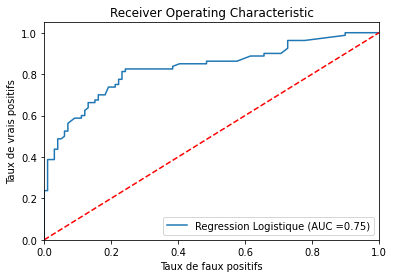

In [331]:
#roc curve and auc
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test) )
fpr , tpr , thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1] )
plt.figure()
plt.plot(fpr, tpr, label='Regression Logistique (AUC =%0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Si le TPR est plus proche de 1, cela montre que c’est un très bon modèle.
Le modèle est capable de distinguer correctement les résultats positifs des résultats négatifs.
Si le TPR est de 0,5, cela montre que le modèle est aussi bon qu’une supposition.
Si le TPR est inférieur à 0,5, cela montre que le modèle prédit des valeurs positives 
comme négatives et des valeurs négatives comme positives.

ICI L'AUC = 0.75 : Cela montre que c'est un très bon modèle. car le modèle a ete capable de predire correctement à 75% le resulat.

# Partie 2 KNN

    Appliquez le KNN et prédisez votre modèle

    Choisissez le nombre optimal de voisins


In [332]:
# KNN
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train) 
y_pred=knn.predict(x_test)
print('Accuracy=',accuracy_score(y_pred,y_test))
print(" prediction : {} " .format(accuracy_score(y_test, y_pred)* 100))

Accuracy= 0.7094972067039106
 prediction : 70.94972067039106 


Choisissez le nombre optimal de voisins

In [333]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.69
Accuracy for k= 2 is: 0.66
Accuracy for k= 3 is: 0.69
Accuracy for k= 4 is: 0.67
Accuracy for k= 5 is: 0.69
Accuracy for k= 6 is: 0.68
Accuracy for k= 7 is: 0.71
Accuracy for k= 8 is: 0.69
Accuracy for k= 9 is: 0.7
Accuracy for k= 10 is: 0.7
Accuracy for k= 11 is: 0.71
Accuracy for k= 12 is: 0.69
Accuracy for k= 13 is: 0.71
Accuracy for k= 14 is: 0.7
Accuracy for k= 15 is: 0.74
Accuracy for k= 16 is: 0.72
Accuracy for k= 17 is: 0.73
Accuracy for k= 18 is: 0.7
Accuracy for k= 19 is: 0.73
Accuracy for k= 20 is: 0.71
Accuracy for k= 21 is: 0.73
Accuracy for k= 22 is: 0.71
Accuracy for k= 23 is: 0.71
Accuracy for k= 24 is: 0.7
Accuracy for k= 25 is: 0.71
Accuracy for k= 26 is: 0.69
Accuracy for k= 27 is: 0.73
Accuracy for k= 28 is: 0.7
Accuracy for k= 29 is: 0.75


Text(0, 0.5, 'Testing Accuracy')

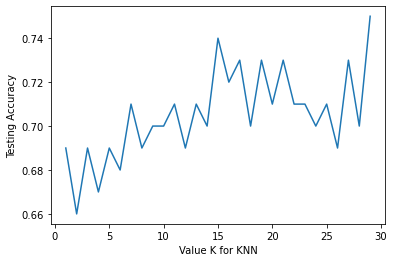

In [334]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

le nombre optimal de voisins est de 7.

# Partie 3 : Arbre de décision et forêt aléatoire

In [335]:
#ARBRE DE DECISION
tree = DecisionTreeClassifier()  
tree.fit(x_train, y_train)   
y_pred=tree.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))
print(" prediction : {} " .format(accuracy_score(y_test, y_pred)* 100))

score:0.8044692737430168
 prediction : 80.44692737430168 


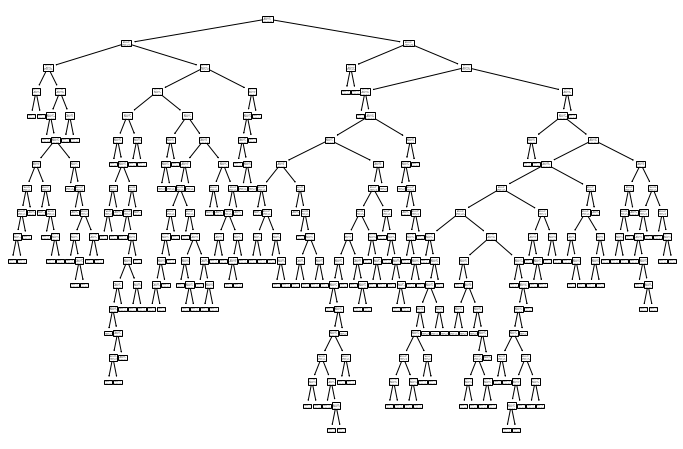

In [337]:
plt.figure(figsize = (12,8))
plot_tree(tree)
plt.show()

In [338]:
#ARBRE DE DECISION avec changement de trois parametres (splitter,max_depth,max_leaf_nodes)
tree = DecisionTreeClassifier(criterion= 'gini',splitter='random', max_depth=5, min_samples_leaf=5,max_leaf_nodes=10)  
tree.fit(x_train, y_train)   
y_pred=tree.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))
print(" prediction : {} " .format(accuracy_score(y_test, y_pred)* 100))

score:0.7597765363128491
 prediction : 75.97765363128491 


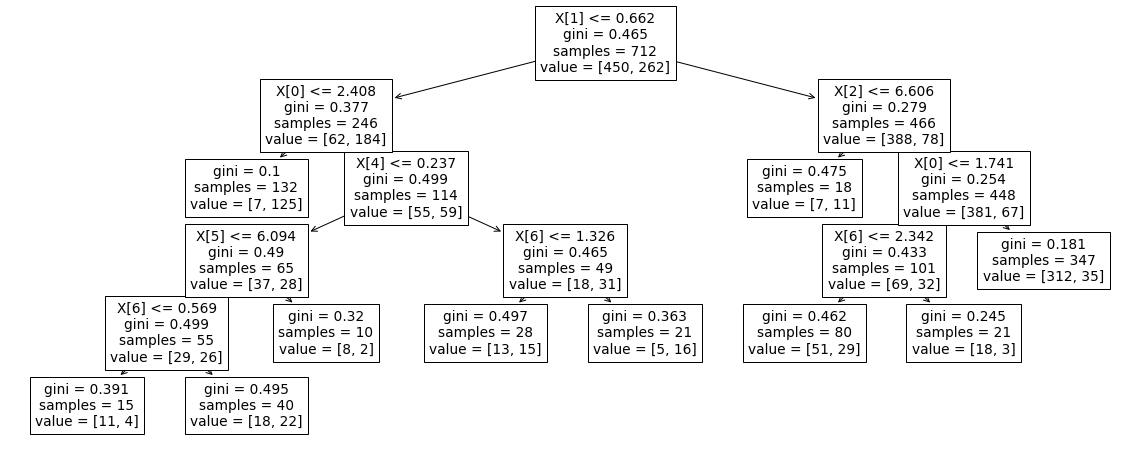

In [339]:
plt.figure(figsize = (20,8))
plot_tree(tree)
plt.show()

NB : essayez de lire les branches de l’arbre et de conclure une prédiction manuellement.
    je n'ai pas ete capable de le faire

In [340]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print("Score Random Forest : ", metrics.accuracy_score(rf_pred, y_test))

Score Random Forest :  0.8044692737430168


In [341]:
# Random Forest avec n_estimators=150
rf = RandomForestClassifier(n_estimators=150)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print("Score Random Forest : ", metrics.accuracy_score(rf_pred, y_test))

Score Random Forest :  0.8100558659217877


les deux scores sont quasiment identiques 0.80 et 0.81

un graphique récapitulatif qui reprend toutes les précisions de chaque modèle
(régression logistique, knn Arbre de décision et forêt aléatoire) 
pour décider quel modèle est le plus performant.

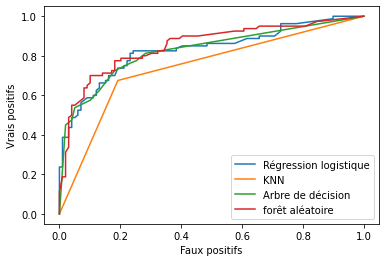

In [345]:
faux_positifs_logreg, vrais_positifs_logreg, seuil_logreg = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.plot(faux_positifs_logreg, vrais_positifs_logreg, label="Régression logistique")
faux_positifs_knn, vrais_positifs_knn, seuil_knn = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
plt.plot(faux_positifs_knn, vrais_positifs_knn, label="KNN")
faux_positifs_tr, vrais_positifs_tr, seuil_tr = roc_curve(y_test, tree.predict_proba(x_test)[:,1])
plt.plot(faux_positifs_tr, vrais_positifs_tr, label="Arbre de décision")
faux_positifs_rf, vrais_positifs_rf, seuil_rf = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
plt.plot(faux_positifs_rf, vrais_positifs_rf, label="forêt aléatoire")
plt.xlabel ("Faux positifs")
plt.ylabel ("Vrais positifs")
plt.legend ()
#print ("AUC Reg. logistique: ",metrics.auc(faux_positifs_logreg, vrais_positifs_logreg))
#print ("AUC Knn: ",metrics.auc(faux_positifs_knn, vrais_positifs_knn))
#print ("AUC Arbre de décision: ",metrics.auc(faux_positifs_tr, vrais_positifs_tr))
#print ("AUC forêt aléatoire: ",metrics.auc(faux_positifs_rf, vrais_positifs_rf))

le modèle le plus performant est la forêt aléatoire